**HIPÓTESIS 2 - CORRELACIÓN ENTRE FUENTES**

**Importar las librerias necesarias**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

Cargar el .csv

In [3]:
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/construccion.csv'
df = pd.read_csv(ruta, encoding='latin-1')

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   sector_id sector_nombre  variable_id         actividad_producto_nombre  \
0         24  Construcción          387  Artículos sanitarios de cerámica   
1         24  Construcción          387  Artículos sanitarios de cerámica   
2         24  Construcción          387  Artículos sanitarios de cerámica   
3         24  Construcción          387  Artículos sanitarios de cerámica   
4         24  Construcción          387  Artículos sanitarios de cerámica   

                 indicador      unidad_de_medida fuente frecuencia_nombre  \
0  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
1  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
2  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
3  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
4  ISAC_desestacionaliz

**Limpieza**

In [4]:
df = df.drop(columns=["sector_id","sector_nombre","cobertura_nombre"], errors="ignore")

df = df.rename(columns={
    "variable_id": "id_variable",
    "actividad_producto_nombre": "nombre_actividad_producto",
    "frecuencia_nombre": "nombre_frecuencia",
    "alcance_tipo": "tipo_alcance",
    "alcance_id": "id_alcance",
    "alcance_nombre": "nombre_alcance"
})

df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
df = df.dropna(subset=["valor"])

Pivot

In [5]:
pivot_df = df.pivot_table(
    index=["indice_tiempo","nombre_actividad_producto","unidad_de_medida"],
    columns="fuente",
    values="valor",
    aggfunc="mean"
).reset_index()

**Matriz de correlación**

In [6]:
corr = pivot_df[["INDEC","CAC","AFCP"]].corr()
print(corr)

fuente  INDEC  CAC  AFCP
fuente                  
INDEC     1.0  NaN   NaN
CAC       NaN  1.0   NaN
AFCP      NaN  NaN   1.0


**Heatmap**

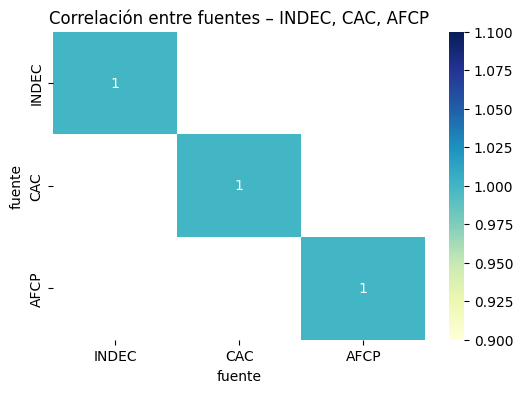

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlación entre fuentes – INDEC, CAC, AFCP")
plt.show()